<a href="https://colab.research.google.com/github/vxfontes/machineLearning/blob/main/deep_learning/classificacao_roupa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [66]:
from tensorflow import keras
import tensorflow
import numpy as np

# importando dataset do keras
dataset = keras.datasets.fashion_mnist

In [67]:
# extraindo as imagens e seus tipos
#   esses tipos estão detalhados no repositório desse dataset em uma tabela variando de 0 a 9
((imagens_treino, identificacoes_treino), (imagens_teste, identificacoes_teste)) = dataset.load_data()


obtendo legenda do github

In [68]:
total_de_classificacoes = 10
nomes_de_classificacoes = ['Camiseta', 'Calça', 'Pullover',
                           'Vestido', 'Casaco', 'Sandália', 'Camisa',
                           'Tênis', 'Bolsa', 'Bota']

### plotagem de algumas imagens

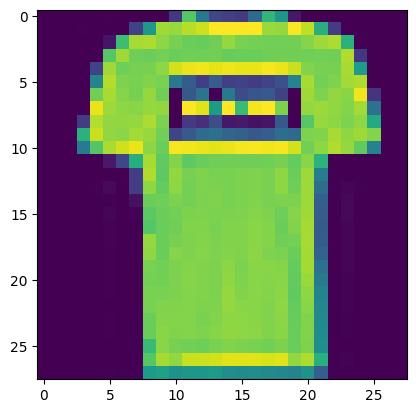

In [69]:
import matplotlib.pyplot as plt

# plotando uma unica imagem
plt.imshow(imagens_treino[1])

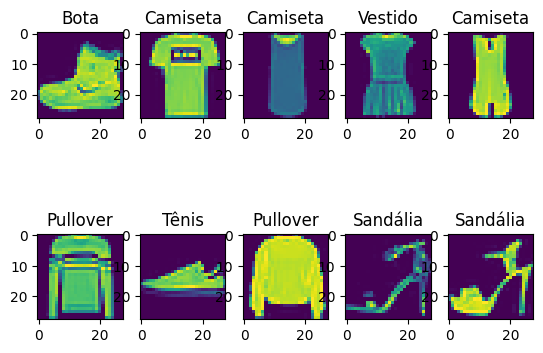

In [70]:
for imagem in range(10):
  # plotando varias imagens em 2 linhas e 5 colunas
  plt.subplot(2, 5, imagem+1)
  plt.imshow(imagens_treino[imagem])
  plt.title(nomes_de_classificacoes[identificacoes_treino[imagem]])

# criando rede neural

- Na machine learning comum, temos uma entrada, processamento e saída, onde o ML atua no processamento nos fornecendo uma saída
- Na rede neural, todos esses passos farão parte do nosso modelo
    
    > modelo (terá) → sequencia
      entrada
      processamento
      saída
    >
    - transformando isso em código com o keras, teremos algo como

In [71]:
modelo = keras.Sequential([
    	# entrada
    	# processamento
    	# saida
])

## criando camada 0 (entrada)

- camadas em inglês → layers
- faremos um achatamento da nossa imagem usando o Flatten
- então em uma camada, achataremos nosso input que é uma imagem 28x28

In [72]:
modelo = keras.Sequential([
  # entrada -> são as imagens
  # input_shape=(28, 28) -> nosso input são as imagens que sabemos que tem 28x28 pixels
    keras.layers.Flatten(input_shape=(28, 28))
  # processamento
  # saida
])

## criando camada 1 (processamento)

fazendo agora a camada de processamento, precisamos fazer com que essas duas camadas conversem entre si, estejam conectadas. para isso criaremos uma camada mais densa **(dense)**, **totalmente conectada**
- definiremos a quantidade de “bolinhas” que queremos conectar, um valor mais testado
    - geralmente se testa usando múltiplos de 2

- Com isso estamos falando que queremos uma camada com 256 funções, bolinhas, que irão ser densas, completamente conectadas à nossa camada que está achatando as nossas imagens
    - mas isso não basta, também temos que informar ao keras como essas “bolinhas” vão se comunicar, seu tipo de ativação
        - para isso definiremos o seu activation=função
        - uma função que vem sendo bastante utilizada pertence ao tensorflow, chamada relu pertencente ao pacote neural network(nn)

In [73]:
modelo = keras.Sequential([
	# entrada -> são as imagens
		keras.layers.Flatten(input_shape=(28, 28)),

	# processamento
		# conexão entre as camadas
		keras.layers.Dense(256, activation=tensorflow.nn.relu)
	# saida
])


## criando camada 2 (saída)

- também será uma camada dense, já que se ligará a todas as anteriores
- mas sabemos que existem 10 tipos de classificações possíveis no nosso exemplo, então essa será a quantidade de “bolinhas” da saída
- quanto a ativação, utilizaremos outra função agora, responsável por verificar qual das categorias é a mais provável de estar correta, chamada  **softmax**


In [74]:
modelo = keras.Sequential([
	# entrada -> são as imagens
		keras.layers.Flatten(input_shape=(28, 28)),

	# processamento
		# conexão entre as camadas
		keras.layers.Dense(256, activation=tensorflow.nn.relu),

	# saida
		# encerramento com quantidade de classificações que sabemos
		keras.layers.Dense(10, activation=tensorflow.nn.softmax)
])

## criando camadas intermediárias


entre a camada de processamento e a camada de saída, a diferença de valor é grande, então podemos adicionar camadas intermediárias
- dividimos o valor da camada de processamento por 2 até chegar perto do valor de saída

In [75]:
modelo = keras.Sequential([
	# entrada -> são as imagens
		keras.layers.Flatten(input_shape=(28, 28)),

	# processamento
		# conexão entre as camadas
		keras.layers.Dense(256, activation=tensorflow.nn.relu),

		# camadas intermediarias
		# keras.layers.Dense(128, activation=tensorflow.nn.relu),
    # keras.layers.Dense(64, activation=tensorflow.nn.relu),
		keras.layers.Dropout(0.2),

	# saida
		# encerramento com quantidade de classificações que sabemos
		keras.layers.Dense(10, activation=tensorflow.nn.softmax)
])

## compilando nossa rede neural

após criar as camadas, precisamos compila-las para poder testar
- como compilar nosso modelo? `modelo.compile(optimizer, loss)`
- o otimizador mais indicado para mais de duas categorias é o `optimizer='adam'`
- quanto a perda, sabemos que todo sistema pode ter uma perda de informação, e para calcular essa perda utilizaremos `loss='sparse_categorical_crossentropy'`
- podemos ainda ter uma métrica de quanto nosso modelo está acertando, utilizando a métrica metrics=['accuracy']

- agora também podemos criar um otimizador personalizado, mexendo nos seus hiperparâmetos

In [76]:
# lr = learning rate = taxa de aprendizado
adam = keras.optimizers.Adam(lr=0.002)

In [77]:
modelo.compile(optimizer=adam, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

Vamos ver o que está acontecendo nessa rede neural
Para isso, vamos utilizar o comando

In [78]:
# resumo do modelo
modelo_summary = modelo.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_11 (Flatten)        (None, 784)               0         
                                                                 
 dense_13 (Dense)            (None, 256)               200960    
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_14 (Dense)            (None, 10)                2570      
                                                                 
Total params: 203530 (795.04 KB)
Trainable params: 203530 (795.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [79]:
# visualizando pesos da primeira camada
pesos_camada_dense = modelo.layers[1].get_weights()[0]

# vieses do modelo
vieses_camada_dense = modelo.layers[1].get_weights()[1]

# treinando rede neural

In [80]:
# normalização para que valores variem entre 0 e 1
imagens_treino = imagens_treino/float(255)

In [81]:
# como já faziamos em modelos de machine learning, fazemos um fit com os dados de treino

# modelo.fit(imagens_treino, identificacoes_treino)

In [82]:
# podemos adicionar mais rodadas de treino para assim fazer com que nosso modelo se adapte ainda mais
# no validation_split, podemos separar uma quantidade de amostras para validação, guardando em uma variável
# temos tambem o batch_size que diminui o tamanho da amostrar fornecida

# historico = modelo.fit(imagens_treino, identificacoes_treino, batch_size=150, epochs=6, validation_split=0.2)

- podemos utilizar callbacks para realizar o nosso treinamento fazendo com que tenha algo monitorando a rede

In [83]:
callbacks = [
    # parar mais cedo se perceber que a rede estagnou e caiu em um mínimo local
    keras.callbacks.EarlyStopping(monitor='val_loss'),
    
    # verificar o checkpoint do nosso modelo que teve o melhor resultado
    # salva o modelo nesse filepath monitorando a perda da validação e salvando apenas a melhor epoca
    keras.callbacks.ModelCheckpoint(filepath='./modelos/roupas_melhor_modelo.hdf5', monitor='val_loss', save_best_only=True)
]

In [84]:
historico = modelo.fit(imagens_treino, identificacoes_treino, epochs=6, validation_split=0.2, callbacks=callbacks)

Epoch 1/6
1500/1500 [==============================] - 6s 4ms/step - loss: 0.5335 - accuracy: 0.8078 - val_loss: 0.4405 - val_accuracy: 0.8383
Epoch 2/6
  46/1500 [..............................] - ETA: 5s - loss: 0.4506 - accuracy: 0.8390

c:\Users\nessa\OneDrive\Desktop\coding\python\machineLearning\.venv\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1500/1500 [==============================] - 7s 4ms/step - loss: 0.4002 - accuracy: 0.8541 - val_loss: 0.3807 - val_accuracy: 0.8592
Epoch 3/6
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3636 - accuracy: 0.8664 - val_loss: 0.3475 - val_accuracy: 0.8734
Epoch 4/6
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3412 - accuracy: 0.8739 - val_loss: 0.3306 - val_accuracy: 0.8795
Epoch 5/6
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3238 - accuracy: 0.8802 - val_loss: 0.3310 - val_accuracy: 0.8838


#### salvando modelo

In [85]:
from tensorflow.keras.models import load_model

modelo.save('./modelos/roupas_modelo.h5')
modelo_salvo = load_model('./modelos/roupas_modelo.h5')

# testando rede e prevendo resultados

agora podemos testar nosso modelo e prever os possíveis resultados usando **predict**

In [86]:
testes = modelo.predict(imagens_teste)

313/313 [==============================] - 1s 2ms/step


In [87]:
# avaliação
indice = 29
print('resultado teste:', np.argmax(testes[indice]))
print('número da imagem de teste:', identificacoes_teste[indice])

resultado teste: 4
número da imagem de teste: 3


In [88]:
# comparando modelo salvo com alterações
indice = 29

testes = modelo.predict(imagens_teste)
print('resultado teste:', np.argmax(testes[indice]))
print('número da imagem de teste:', identificacoes_teste[indice])

testes_modelo_salvo = modelo_salvo.predict(imagens_teste)
print('resultado teste modelo salvo:', np.argmax(testes_modelo_salvo[indice]))
print('número da imagem de teste:', identificacoes_teste[indice])

313/313 [==============================] - 1s 3ms/step
resultado teste: 4
número da imagem de teste: 3
313/313 [==============================] - 1s 3ms/step
resultado teste modelo salvo: 4
número da imagem de teste: 3


como podemos saber se o modelo está indo bem ou não?
- tem uma função no proprio modelo que avalia, nos devolvendo a perda e a acurácia do nosso teste

In [89]:
perda, acuracia = modelo.evaluate(imagens_teste, identificacoes_teste)
print('Perda do teste:', perda)
print('Acurácia do teste:', acuracia)

313/313 [==============================] - 1s 2ms/step - loss: 50.5910 - accuracy: 0.8632
Perda do teste: 50.591026306152344
Acurácia do teste: 0.8632000088691711


# plotagem de gráficos de acurácia e perda

para tornar mais visual, podemos plotar gráficos para visualizar a acurácia e a perda tanto no teste quanto na avaliação

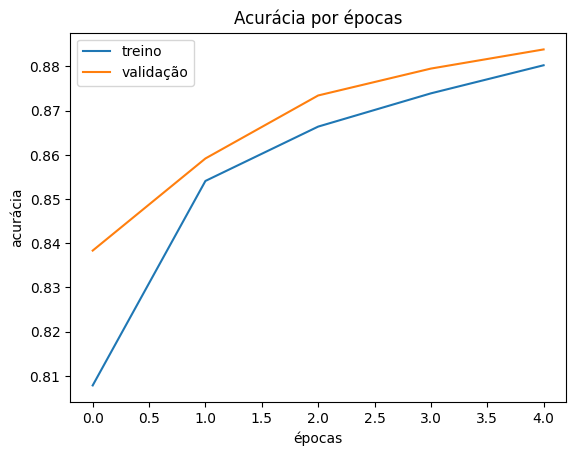

In [90]:
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acurácia por épocas')
plt.xlabel('épocas')
plt.ylabel('acurácia')
plt.legend(['treino', 'validação'])

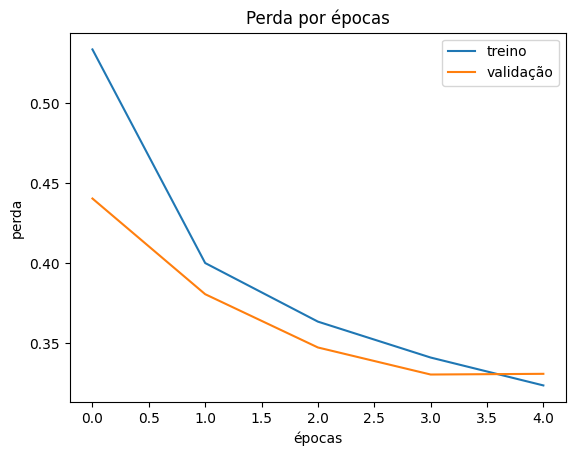

In [91]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Perda por épocas')
plt.xlabel('épocas')
plt.ylabel('perda')
plt.legend(['treino', 'validação'])